# Global temperature anomaly by latitude using GISTEMP v4

The dataset is available for download as a NetCDF file on regular 2°×2° grid.

In [1]:
url = 'https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz'

The dataset is small enough (23 MB) that it is sufficient to make local copy of the file.

In [2]:
!wget -nc {url}

File ‘gistemp1200_GHCNv4_ERSSTv5.nc.gz’ already there; not retrieving.



The python library Xarray is able to open a NetCDF file even if it is compressed using gzip.

In [3]:
import xarray as xr
import numpy as np
import matplotlib.animation as animation

In [4]:
ds = xr.open_dataset('gistemp1200_GHCNv4_ERSSTv5.nc.gz')
ds

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1724, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-08-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-09-12 11:28:28 by SBBX_to_nc 2.0 - ILAND=1200,...

Visualize the surface temperature anomally for the last month of this dataset:

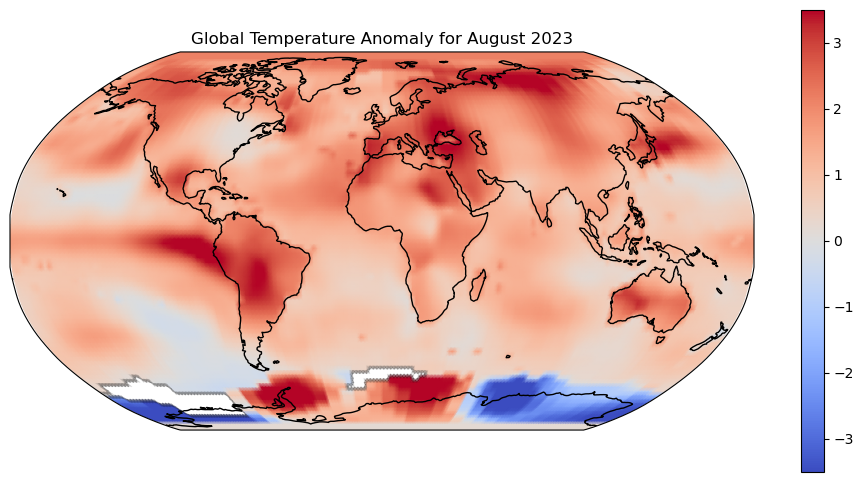

In [11]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from IPython.display import HTML
from IPython.display import display

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.Robinson())

plt.pcolormesh(ds.lon, 
              ds.lat, 
              ds.tempanomaly.isel(time=-1),
              cmap='coolwarm', 
              norm=colors.CenteredNorm(halfrange=3.5),
              
              shading='gouraud',
              transform=ccrs.PlateCarree() )

ax.coastlines()

plt.colorbar()
ax.set_title(f'Global Temperature Anomaly for August 2023')

plt.savefig('tempanomaly.png')

In [9]:
plt.savefig('tempanomaly_aug2023.png')

<Figure size 640x480 with 0 Axes>

Animate annual global temperatures averaged by longitude over time.

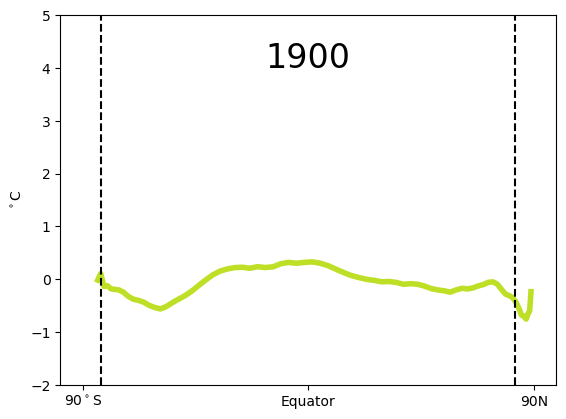

In [6]:
fig, ax = plt.subplots()

ds2 = ds.resample(time='1y').mean().mean(dim='lon').tempanomaly

n = 2023-1900+1
color = plt.cm.viridis_r(np.linspace(0.1,0.9,n)) # This returns RGBA; convert:
hexcolor = map(lambda rgb:'#%02x%02x%02x' % (rgb[0]*255,rgb[1]*255,rgb[2]*255),
               tuple(color[:,0:-1]))
ax.set_prop_cycle(color=color)

label = plt.text(0, 4, '', 
         horizontalalignment='center', fontsize=24)

lines = plt.plot(np.sin(np.deg2rad(ds2.lat)), 
        ds2.sel(time=slice('1900-01-01', None)).T, 
        linestyle='None',linewidth=4,
     )

plt.ylim(-2, 5)
plt.ylabel('$^\circ$C')

plt.axvline(np.sin(np.deg2rad(-66.57)), color='k', linestyle='--')
plt.axvline(np.sin(np.deg2rad(66.57)), color='k', linestyle='--')
plt.xticks([-1, 0, 1], labels=('90$^\circ$S', 'Equator', '90N'))

def update(frame):
    # for each frame, update the data stored on each artist.
    year = 1900 + frame
    label.set_text(year)
    lines[frame].set_linestyle('-')
    if frame > 0:
        lines[frame-1].set_linewidth(1)
    
    return (label)


ani = animation.FuncAnimation(fig=fig, func=update, frames=n, interval=300)


In [7]:
ani.save('anim.gif')

In [ ]:
display(HTML(ani.to_jshtml()))